In [29]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# we are using the inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
# install xlrd
!pip install xlrd

print('xlrd installed!')

xlrd installed!


In [31]:
# df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
#                        sheet_name='Canada by Citizenship',
#                        skiprows=range(20),
#                        skip_footer=2)

# print ('Data read into a pandas dataframe!')

df_can = pd.read_excel('https://s3.hothienlac.com/yomitoon/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [32]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [33]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [34]:
df_can['Total'] = df_can[list(range(1980, 2014))].sum(axis=1)

In [35]:
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,615,454,663,611,508,494,434,437,407,8598
195,Unknown,World,World,World,44000,18078,16904,13635,14855,14368,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


So sánh số lượng người nhập cư giữa các quốc gia đã phát triển và đang phát triển

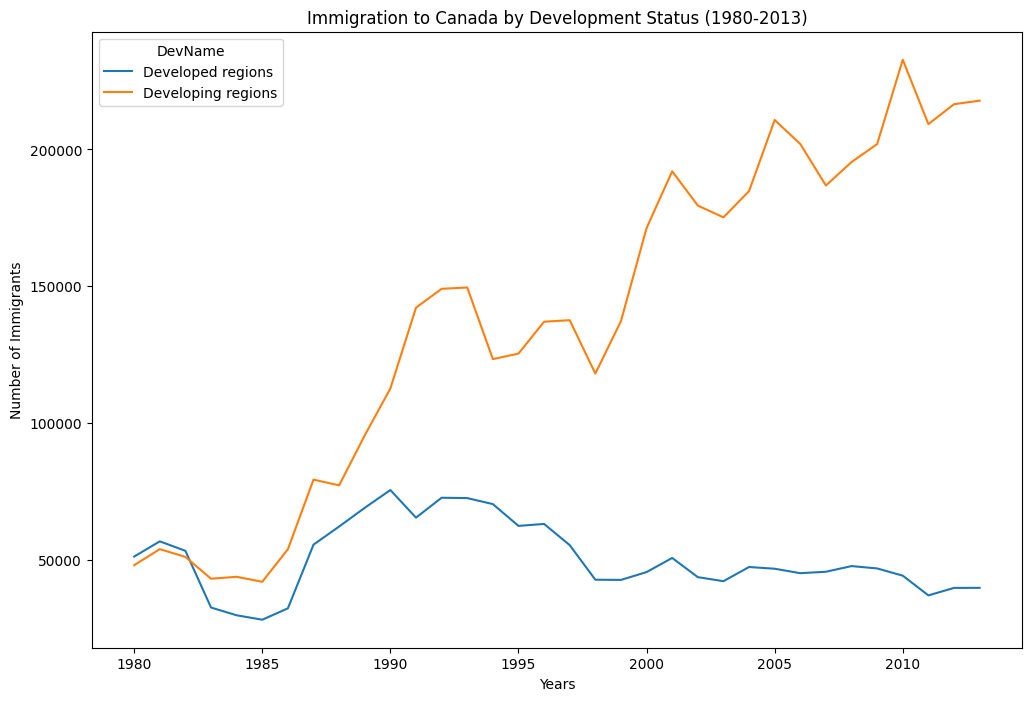

In [36]:
years = list(range(1980, 2014))
df_dev_regions = df_can[df_can['DevName'].isin(['Developing regions', 'Developed regions'])]
df_dev_regions = df_dev_regions.groupby('DevName')[years].sum()

# Transpose the dataframe to have years as the index
df_dev_regions = df_dev_regions.transpose()

# Convert index to integer for plotting
df_dev_regions.index = df_dev_regions.index.map(int)

df_dev_regions.plot(kind='line', figsize=(12, 8))

plt.title('Immigration to Canada by Development Status (1980-2013)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Trong giai đoạn đầu thập niên 1990, số lượng người nhập cư vào Canada tăng mạnh bởi sự kết hợp giữa chính sách mở cửa của chính phủ và những biến động quốc tế. Canada chủ động nâng chỉ tiêu nhập cư để bổ sung nguồn lao động và thúc đẩy tăng trưởng kinh tế, đồng thời khẳng định bản sắc đa văn hóa, khuyến khích tiếp nhận người từ nhiều khu vực ngoài châu Âu. Bên cạnh đó, sự tan rã của Liên Xô, khủng hoảng kinh tế – chính trị ở Đông Âu, chiến tranh vùng Vịnh và bất ổn tại Trung Đông, Nam Á đã khiến nhiều người tìm đến Canada như một nơi an toàn và giàu cơ hội. Chính những yếu tố này đã tạo nên làn sóng nhập cư lớn, góp phần thay đổi diện mạo nhân khẩu học và xã hội của Canada trong thập niên 1990.